In [1]:
from train import get_loaders
import torch
import yaml

/home/ws/tb0536/anaconda3/lib/python3.7/site-packages/kornia/augmentation/augmentation.py:1875: DeprecationWarning: GaussianBlur is no longer maintained and will be removed from the future versions. Please use RandomGaussianBlur instead.
  category=DeprecationWarning,
/home/ws/tb0536/anaconda3/lib/python3.7/site-packages/catalyst/registry/registry.py:42: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  class Registry(collections.MutableMapping):


In [2]:
with open('training_configs/dataset/eyes_sorting.yaml') as f:
    dl_config = yaml.safe_load(f)

In [3]:
dl_config['train_test_split_kwargs']['volumes_limit'] = 5

In [4]:
train_loader, test_loader = get_loaders(**dl_config)

>>>>>>>>>>>>>>>> loading datasets
<<<<<<<<<<<<<<<< done in 1.7 sec.


In [5]:
from matplotlib import pyplot as plt
%matplotlib inline

In [6]:
%%time
bloat = train_loader.__iter__()

CPU times: user 36.6 ms, sys: 547 ms, total: 584 ms
Wall time: 610 ms


In [7]:
%%time
batch = bloat.__next__()

CPU times: user 1.93 s, sys: 1.28 s, total: 3.2 s
Wall time: 3.64 s


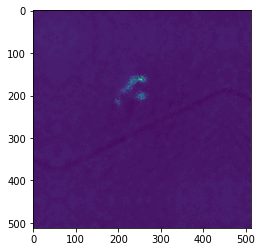

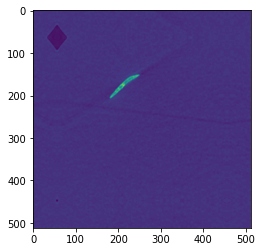

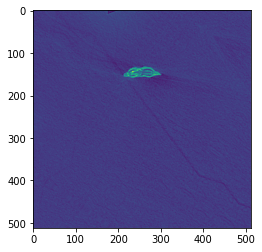

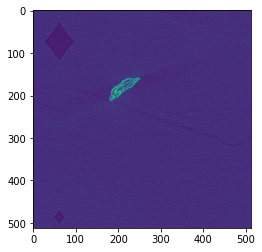

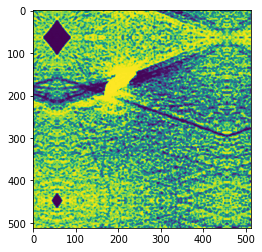

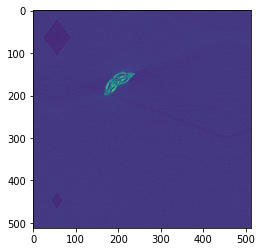

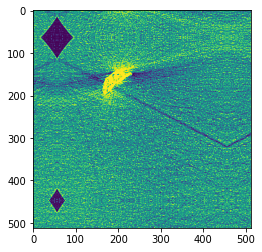

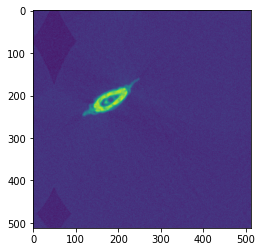

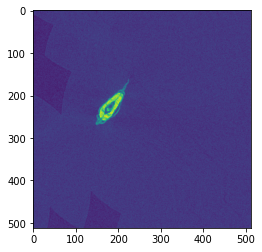

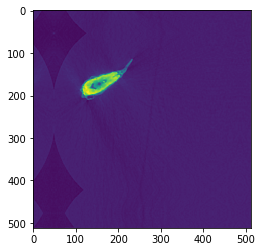

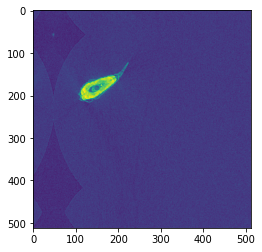

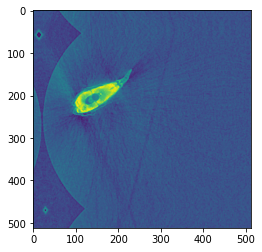

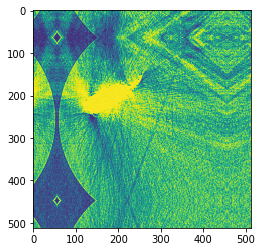

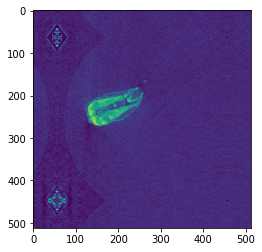

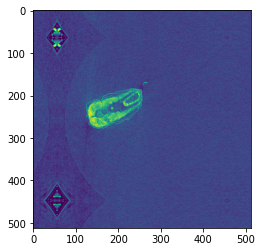

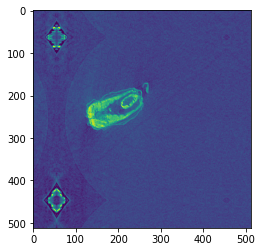

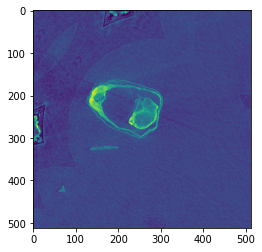

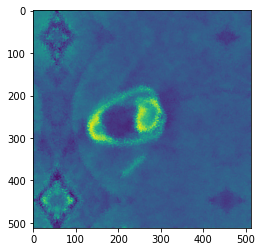

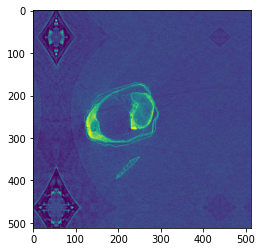

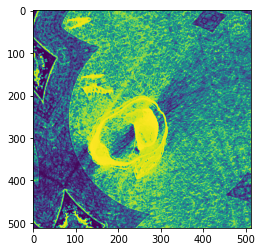

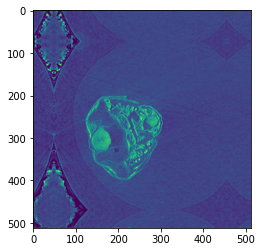

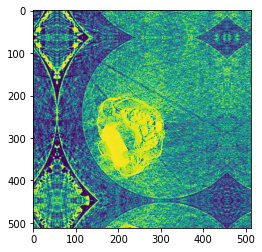

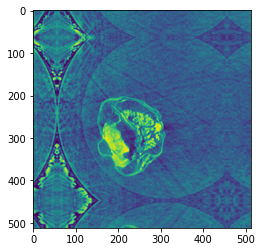

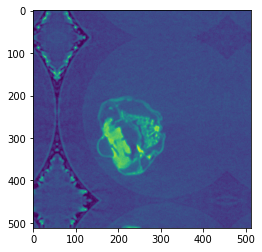

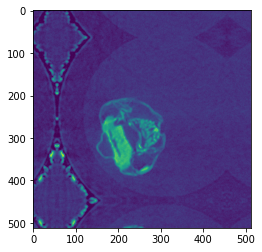

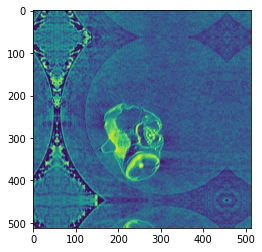

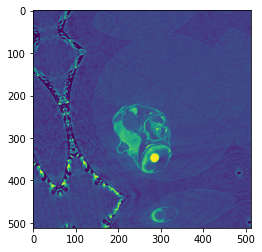

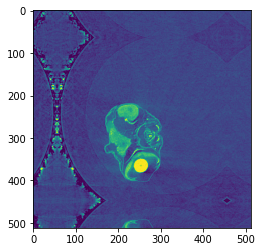

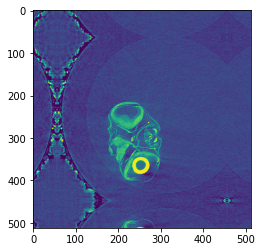

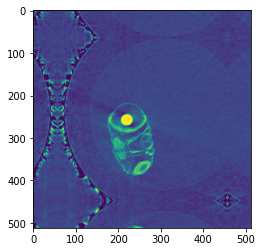

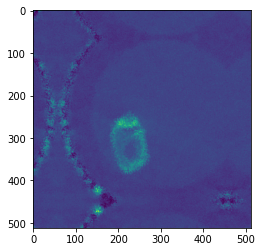

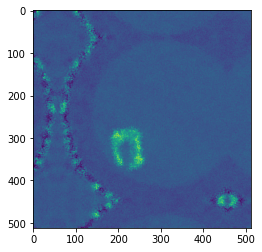

In [8]:
for i in torch.argsort(batch[1]):
    plt.imshow(batch[0][i, 0])
    plt.show()

In [16]:
from train import get_criterion

In [17]:
with open('training_configs/criterion/sorting.yaml') as f:
    cr_config = yaml.safe_load(f)

In [18]:
criterion = get_criterion(**cr_config)

>>>>>>>>>>>>>>>> getting criterion
<<<<<<<<<<<<<<<< done in 0.00012 sec.


In [12]:
from train import get_model

In [13]:
with open('training_configs/model/eyes_sorting.yaml') as f:
    md_config = yaml.safe_load(f)

In [14]:
model = get_model(**md_config)

>>>>>>>>>>>>>>>> initializing model
trainable parameters in model: 11170755
<<<<<<<<<<<<<<<< done in 0.17 sec.


In [15]:
embedding = model(batch[0])
loss = criterion(embedding, batch[1])
print(embedding, loss)

tensor([[ 0.1212],
        [-0.0757],
        [-0.0596],
        [ 0.6263],
        [ 0.6429],
        [-0.2332],
        [-0.2082],
        [-0.1289],
        [-0.0762],
        [-0.3548],
        [-0.0868],
        [-0.1604],
        [-0.0333],
        [-0.2651],
        [-0.0310],
        [-0.1070],
        [-0.1626],
        [-0.0047],
        [ 0.0505],
        [-0.0916],
        [-0.1178],
        [-0.1314],
        [-0.2057],
        [-0.0933],
        [-0.0282],
        [-0.2961],
        [ 1.1330],
        [ 0.0686],
        [-0.1251],
        [-0.1884],
        [ 0.7541],
        [-0.1314]], grad_fn=<SelectBackward>) tensor(0.2950, grad_fn=<MeanBackward0>)
